# COGS 108 - Final Project (gender bias that exists in income of males and females)

# Overview

Our project is intended to investigate the potential gender bias that contributes to the income gap between male and female workers in different industries in the U.S from 2013 to 2016. We choose eight major industries here to make analysis, and they are Computer, Engineering, and Science, Education, Legal, Community Service, Arts, and Media, Healthcare Practitioners and Technical, Management, Business and Financial, Natural Resources, Construction, and Maintenance, Production, Transportation, and Material Moving, Sales and Office, and Service. Our result is that there is a gender bias toward women so that the income of female workers are always lower than males, and no matter the industry is male or female-dominated (accurately speaking, not dominated, but female workers are 8.8% more than male workers), this gap doesn't change. We also explore a potential confounding variable that may also contribute to the income gap between males and females, which is the education level of workers, and the result doesn't show the effect of the education level on the income gap.

# Names

- Aven Huang
- Jiaqi Feng
- Xilei Liu
- Yiyi Xu

# Research Question

Is there a difference between the annual incomes of males and females in different industries in the United States from 2013 to 2016? If some industries are male/female-dominated, does this difference still exist? Besides gender, does the education level of males and females contribute to this income gap?

We will look at eight different major industries in the U.S:

- Computer, Engineering, and Science
- Education, Legal, Community Service, Arts, and Media
- Healthcare Practitioners and Technical
- Management, Business and Financial
- Natural Resources, Construction, and Maintenance
- Production, Transportation, and Material Moving
- Sales and Office
- Service.

<a id='background'></a>

## Background & Prior Work

The gender bias that exists in working industries is always a hot topic for people to discuss. Even though many companies have shown their commitment to gender equality by establishing family-friendly policies and facilitating women’s careers and professional networks, unconscious gender bias continues to impact women in the workplace on different aspects. The most obvious one seems to be shown on average income. According to weekly earnings data from the Bureau of Labor Statistics [1] from 1979 to 2020, even though the persistent pay gap that exists between women's and men's weekly earnings was narrowed from women earned 61.5% of men's weekly earnings to 81.7% of men's weekly earnings, this gap will continue to 2059 according to the prediction of The Institute for Women's Policy Research. We can see that women were always at a disadvantage compared to men in the workplace, even with the development of society. Amanda & Anna (2021) [2] also mentions the impact of implicit prejudice against women on women's earnings nowadays. Even though women became to have more opportunities in higher-paying jobs traditionally dominated by men, such as professional and managerial positions, women as a whole continue to be overrepresented in lower-paying occupations relative to their share of the workforce. This may contribute to gender differences in pay.

Based on the previous work, we are interested in investigating the relationship between gender and income in the U.S. We want to see the effect of potential gender bias in different industries in the U.S on the annual income of males and females since it is still a worth-noting problem even during pandemics. We want to identify this income gap among different industries in the U.S, and we want to know whether male or female-dominated in a specific industry will retain or make some changes to this gap. According to Bleiweis(2020) [3], so-called women’s jobs (jobs that have historically had majority-female workforces) tend to offer lower pay and fewer benefits than so-called men’s jobs (jobs that have had predominantly male workforces). These gendered differences are true across all industries and the vast majority of occupations, at all levels, from frontline workers to mid-level managers to senior leaders. From this study, we think we can further explore whether female-dominated industries still cannot change the income gap between males and females since we expect that the income gap will be reversed if an industry is dominated by women. If it is not reversed or doesn't have many changes, then the gender bias toward females in different industries is a problem that needs to be concerned by everyone.

Besides the effect of gender bias on the income gap between males and females, we also want to explore some confounding variables that also might play a role in the differences between male and female income. For example, the education level of these workers. According to Day(2019) [4], the difference between men’s and women’s earnings widens with more education. Among workers with a bachelor’s degree, women earn 74 cents for every dollar men make, which is less than the 78 cents for workers without a college degree. From this reference, we can see that while gender bias exists in the pay gap between males and females, the education level may also play a role in this difference. From all of the studies above, we learned that gender bias might still be a serious problem that worth to be concerned about. Through exploring the relationship between gender and income, we may call on everyone to consider some ways that can truly change the workplace inequalities caused by gender differences and seek more job benefits for both males and female employees.

References (include links):

1) https://www.ilo.org/wcmsp5/groups/public/---ed_dialogue/---act_emp/documents/publication/wcms_601276.pdf

2) https://www.pewresearch.org/fact-tank/2021/05/25/gender-pay-gap-facts/

3) https://www.americanprogress.org/issues/women/reports/2020/03/24/482141/quick-facts-gender-wage-gap/

4) https://www.census.gov/library/stories/2019/05/college-degree-widens-gender-earnings-gap.html

# Hypothesis


We hypothesize that there is a difference between annual incomes of males and females in these eight industries in the United States from 2013 to 2016, and if there is an observed difference in income, we hypothesize that the income of males is higher than that of females. At the same time, whether this industry is male or female dominated doesn't make changes to this income gap.

# Dataset(s)

### Dateset 1
Dataset Name: jobsgender.csv

Link to the dataset: https://www.kaggle.com/kaelihall/women-in-the-workplace?select=jobsgender.csv

Number of observations: 2088

This dataset contains the numbers of male and female workers, their annual income, and their employment rate in different occupations of eight industries from 2013 to 2016 in the U.S. We want to utilize several variables in this dataset to answer our question, such as the employment rate of male and female workers in the eight industries (to determine whether a certain industry is male or female-dominated) and the annual income of male and female workers in these industries.

### Dataset 2
Dataset Name: DetailsByEducation.csv

Link to the dataset: https://www.kaggle.com/kaelihall/women-in-the-workplace?select=jobsgender.csv

Number of observations: 569

This dataset has been taken from U.S government works and contains the numbers of male and female workers with or without bachelor degrees in different industries and their annual income from 2013 to 2016 in the U.S.We want to utilize the data of men and women with bachelor degrees to analyze the effect of the confounding variable (education level) to the income gap between males and females.

# Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind
from scipy.stats import ks_2samp

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (15, 12)

# Data Cleaning

We plan to load the chosen dataset into pandas dataframe(the usable format we chose). 
Some pre-processing steps that were required for our later analysis might be: 
1. rename the columns which are not easily understandable into more direct names. 
2. Add some columns of values which we think is important for later analysis. We calculate the values of that new column by dividing one columns' values by another column's values that we chose. For example, percentage of male workers as compared to total number of workers as the male employment rate.
3. Clean datasets by dropping rows which contain missing values, and drop the column whose values are all NaN. 

We first read the dataset that we need below.

In [3]:
# since this dataset is about the employment rate and income, we name it as employ_income to make it clear
employ_income = pd.read_csv('data/jobsgender.csv') 
employ_income.head()

,year,occupation,major_category,minor_category,...,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
0,2013,Chief executives,"Management, Business, and Financial",Management,...,120254,126142.0,95921.0,76.04
1,2013,General and operations managers,"Management, Business, and Financial",Management,...,73557,81041.0,60759.0,74.97
2,2013,Legislators,"Management, Business, and Financial",Management,...,67155,71530.0,65325.0,91.33
3,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,...,61371,75190.0,55860.0,74.29
4,2013,Marketing and sales managers,"Management, Business, and Financial",Management,...,78455,91998.0,65040.0,70.70


In [4]:
employ_income.columns

Index(['year', 'occupation', 'major_category', 'minor_category',
       'total_workers', 'workers_male', 'workers_female', 'percent_female',
       'total_earnings', 'total_earnings_male', 'total_earnings_female',
       'wage_percent_of_male'],
      dtype='object')

In [5]:
# Since this dataset is about education level, we name it as edu to make it clear
edu = pd.read_csv('data/DetailsByEducation.csv')
edu.head(5)

,major_category,minor_category,Occupational Category,total_salary,...,total_with_bachelors,men_with_bachelors,women_with_bachelors,Unnamed: 12
0,total,Total,Total,"47,986",...,"70,110","81,354","60,069",NaN
1,"Management, Business, and Financial Occupations",NaN,"Management, Business, Science, and Arts Occupa...","66,294",...,"75,764","90,567","64,134",NaN
2,"Management, Business, and Financial Occupations","Management, Business, and Financial Occupations","Management, Business, and Financial Occupations","71,632",...,"85,833","100,224","72,742",NaN
3,"Management, Business, and Financial Occupations","Management, Business, and Financial Occupations",Management Occupations,"75,591",...,"92,970","102,332","79,091",NaN
4,"Management, Business, and Financial Occupations","Management, Business, and Financial Occupations",Chief executives,"130,426",...,"150,885","159,401","121,373",NaN


In [6]:
edu.columns

Index(['major_category', 'minor_category', 'Occupational Category',
       'total_salary', 'total_mens_salary', 'total_womens_salary',
       'total_less_bachelors', 'mens_less_bachelors', 'womens_less_bachelors',
       'total_with_bachelors', 'men_with_bachelors', 'women_with_bachelors',
       'Unnamed: 12'],
      dtype='object')

After we look at the employ_income dataset, we find that it only contains the employment rate of female in each industry, so we want to calculate the male employment rate by utilizing the number of male workers and total number of workers in the emlploy_income dataset.

In [7]:
# we name the employment rate of male workers as percent_male.
employ_income = employ_income.assign(percent_male= (employ_income['workers_male'] / employ_income['total_workers'])*100)

# since the column of employment rate of male workers appears at the last column, 
# we move it to the position before the percent_female to make the dataset clear.
col_name = 'percent_male'
seven_col = employ_income.pop('percent_male')
employ_income.insert(7, 'percent_male', seven_col)

For the income of male and female workers, we decide to keep the annual total earnings of male and female workers, so we drop the column of "total_earnings" and "wage_percent_of_male".

In [8]:
employ_income = employ_income.drop(['total_earnings','wage_percent_of_male'], axis = 1)

We notice that the major_category in the two datasets refer to the names of different industries, so we rename the "major_category" in the two datasets for clarification.

In [9]:
employ_income = employ_income.rename(columns = {'major_category' : 'Industry'}) 
employ_income.head()

,year,occupation,Industry,minor_category,...,percent_male,percent_female,total_earnings_male,total_earnings_female
0,2013,Chief executives,"Management, Business, and Financial",Management,...,76.39,23.6,126142.0,95921.0
1,2013,General and operations managers,"Management, Business, and Financial",Management,...,69.75,30.3,81041.0,60759.0
2,2013,Legislators,"Management, Business, and Financial",Management,...,56.53,43.5,71530.0,65325.0
3,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,...,41.32,58.7,75190.0,55860.0
4,2013,Marketing and sales managers,"Management, Business, and Financial",Management,...,58.33,41.7,91998.0,65040.0


In [10]:
edu = edu.rename(columns = {'major_category' : 'Industry'})

We will use the edu dataset to analyze confounding factors, which is the percent of male/female with bachelor degrees in each industry in our later analysis, so we only need four columns in edu: "Industry", "total_with_bachelors", "men_with_bachelors", and "women_with_bachelors". So we drop the rest.

In [11]:
edu = edu[["Industry", "mens_less_bachelors", "men_with_bachelors",'womens_less_bachelors',"women_with_bachelors"]]
edu.head()

,Industry,mens_less_bachelors,men_with_bachelors,womens_less_bachelors,women_with_bachelors
0,total,"42,298","81,354","32,825","60,069"
1,"Management, Business, and Financial Occupations","60,523","90,567","45,144","64,134"
2,"Management, Business, and Financial Occupations","61,234","100,224","48,153","72,742"
3,"Management, Business, and Financial Occupations","61,864","102,332","48,880","79,091"
4,"Management, Business, and Financial Occupations","100,411","159,401","76,358","121,373"


In [12]:
# Drop the first row in edu since it does not specify industry
edu = edu.iloc[1:]

Then, we check if there are any NaN value exists in the two datasets. If so, we drop them.

In [13]:
# check for employ_income dataset
employ_income.isnull().sum()

year                      0
occupation                0
Industry                  0
                         ..
percent_female            0
total_earnings_male       4
total_earnings_female    65
Length: 11, dtype: int64

In [14]:
# Drop rows which contain missing values in employ_income.
employ_income = employ_income.dropna(axis = 0)

In [15]:
# check if there are any missing values in edu dataset.
edu.isnull().sum()

Industry                 49
mens_less_bachelors      11
men_with_bachelors       11
womens_less_bachelors    11
women_with_bachelors     11
dtype: int64

In [16]:
# in dataframe edu, drop rows which contain missing values and reset the index.
edu = edu.dropna(axis = 0)
edu = edu.reset_index(drop = True)

Check the types of each column in edu and convert 3 numerical columns we need to int:

In [17]:
edu.dtypes

Industry                 object
mens_less_bachelors      object
men_with_bachelors       object
womens_less_bachelors    object
women_with_bachelors     object
dtype: object

In [18]:
# clean Industry column
edu.Industry = edu.Industry.apply(lambda x: x[:-12])

In [19]:
# clean 4 numerical columns we need to clear format with regex
edu['mens_less_bachelors'] = edu['mens_less_bachelors'].apply(lambda x: re.sub('[^0-9]+', '', x))
edu['womens_less_bachelors'] = edu['womens_less_bachelors'].apply(lambda x: re.sub('[^0-9]+', '', x))
edu['men_with_bachelors'] = edu['men_with_bachelors'].apply(lambda x: re.sub('[^0-9]+', '', x))
edu['women_with_bachelors'] = edu['women_with_bachelors'].apply(lambda x: re.sub('[^0-9]+', '', x))

In [20]:
# exclude rows with empty cells in these 4 columns
edu = edu[
          (edu['men_with_bachelors'] != '') & (edu['women_with_bachelors'] != '') &
          (edu['mens_less_bachelors'] != '') & (edu['womens_less_bachelors'] != '')
    
         ]

In [21]:
# convert these 4 columns from object to int
edu['mens_less_bachelors'] = edu['mens_less_bachelors'].apply(lambda x: int(x))
edu['womens_less_bachelors'] = edu['womens_less_bachelors'].apply(lambda x: int(x))
edu['men_with_bachelors'] = edu['men_with_bachelors'].apply(lambda x: int(x))
edu['women_with_bachelors'] = edu['women_with_bachelors'].apply(lambda x: int(x))

# Data Analysis & Results

## EDA

We want to first have a glance at the annual income of male and female workers in the eight industries, so we calculate the total income of males and females in eight different industries and combine them into a dataframe for further visualization.

In [22]:
# pivot table for total earnings of male and female across indusries
# directly look at the numerical values for comparison
avg_earning_by_ind = employ_income.pivot_table(index = 'Industry',
                                             values = ['total_earnings_male', 'total_earnings_female'],
                                             aggfunc = np.mean
                                            )

avg_earning_by_ind = avg_earning_by_ind[['total_earnings_male', 'total_earnings_female']]

avg_earning_by_ind

,total_earnings_male,total_earnings_female
Industry,,
"Computer, Engineering, and Science",80191.00,69427.31
"Education, Legal, Community Service, Arts, and Media",54402.95,46257.66
Healthcare Practitioners and Technical,81486.81,68051.49
...,...,...
"Production, Transportation, and Material Moving",40769.10,32437.85
Sales and Office,44986.89,37105.95
Service,36644.04,31987.96


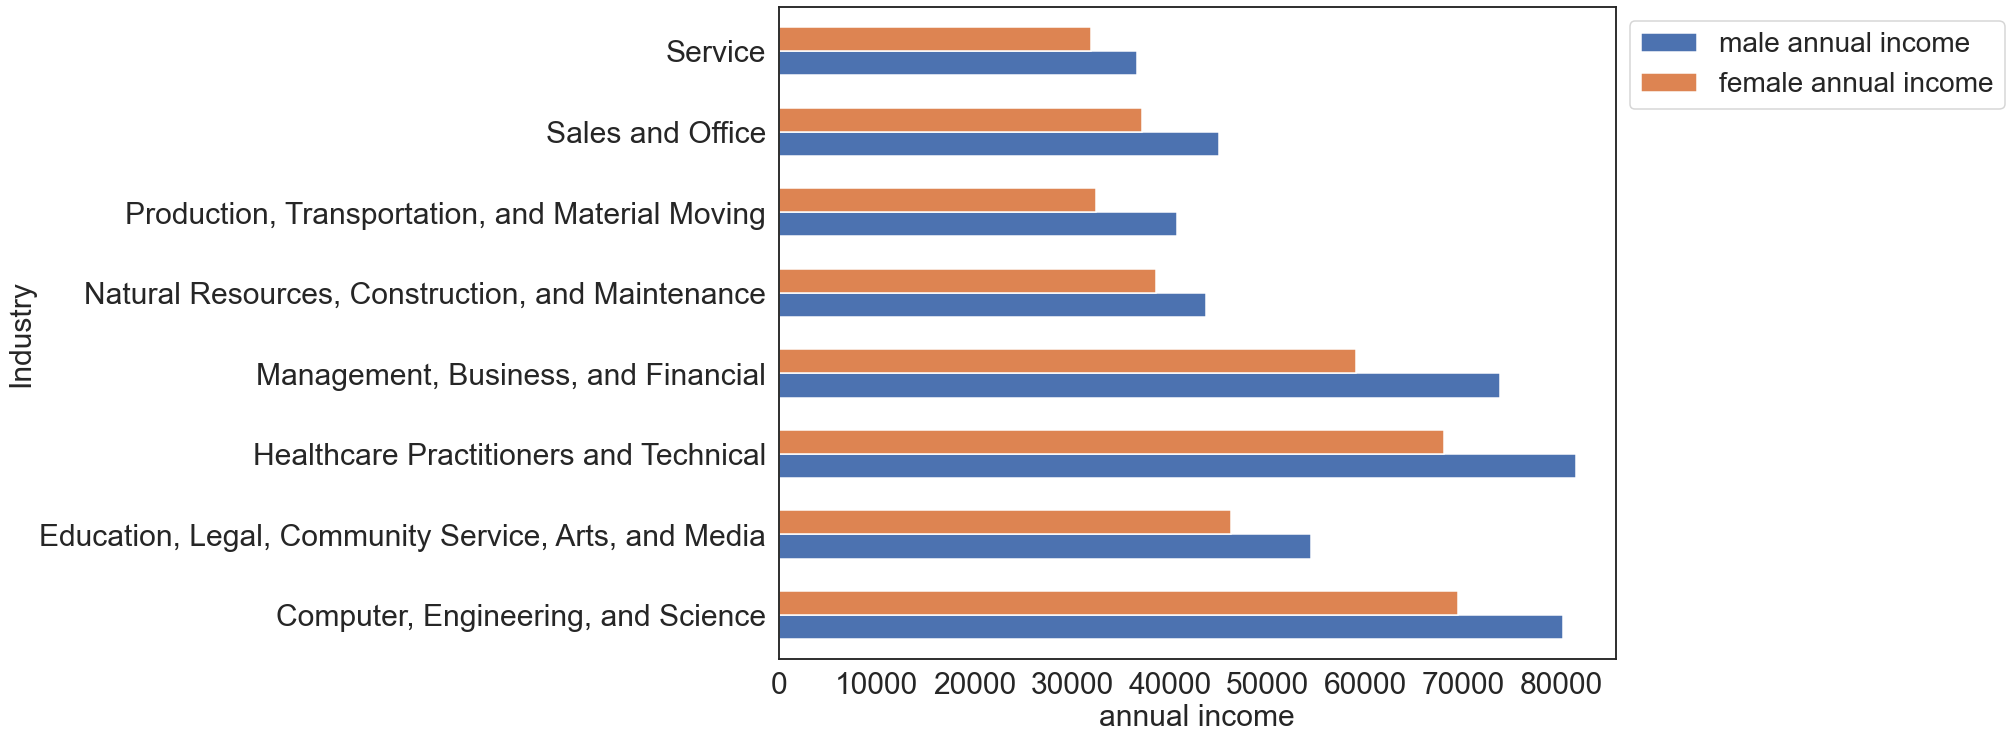

In [23]:
# barplot for total earnings of male and female across different industries
earnings = avg_earning_by_ind.plot(kind='barh',fontsize = 30, width = 0.6); 
earnings.set_xlabel('annual income',fontsize = 30);
earnings.set_ylabel('Industry', fontsize = 30);
earnings.legend(["male annual income", "female annual income"],bbox_to_anchor=(1, 1), loc='upper left',fontsize = 28)

From the figure above, we can see that among all the eight different industries in the U.S from 2013-2016, the annual income of males is always higher than the income of females. It seems like there is a difference between male and female annual income in these industries, and we want to further look at the data taking the variable of whether some specific industries are male or female-dominated into consideration and see whether this difference still exists.

For the variable of the industries that are mostly male and female-dominated, we want to determine them by comparing the employment rate of male and female workers in the eight industries. If the employment rate of males is higher than the of females, then the industry is male-dominated. If the employment rate of females is higher than that of males, then the industry is female-dominated. As a result, we make a dataset that contains the male and female employment rates in the eight industries for further visualization.

In [24]:
# pivot table for percent of male and female across indusries
# directly look at the numerical values for comparison
gender_by_ind = employ_income.pivot_table(index = 'Industry',
                                             values = ['percent_female','percent_male'],
                                             aggfunc = np.mean
                                            )
gender_by_ind = gender_by_ind[['percent_male','percent_female',]]

gender_by_ind

,percent_male,percent_female
Industry,,
"Computer, Engineering, and Science",72.95,27.05
"Education, Legal, Community Service, Arts, and Media",45.60,54.40
Healthcare Practitioners and Technical,35.89,64.11
...,...,...
"Production, Transportation, and Material Moving",77.90,22.10
Sales and Office,41.02,58.98
Service,53.04,46.96


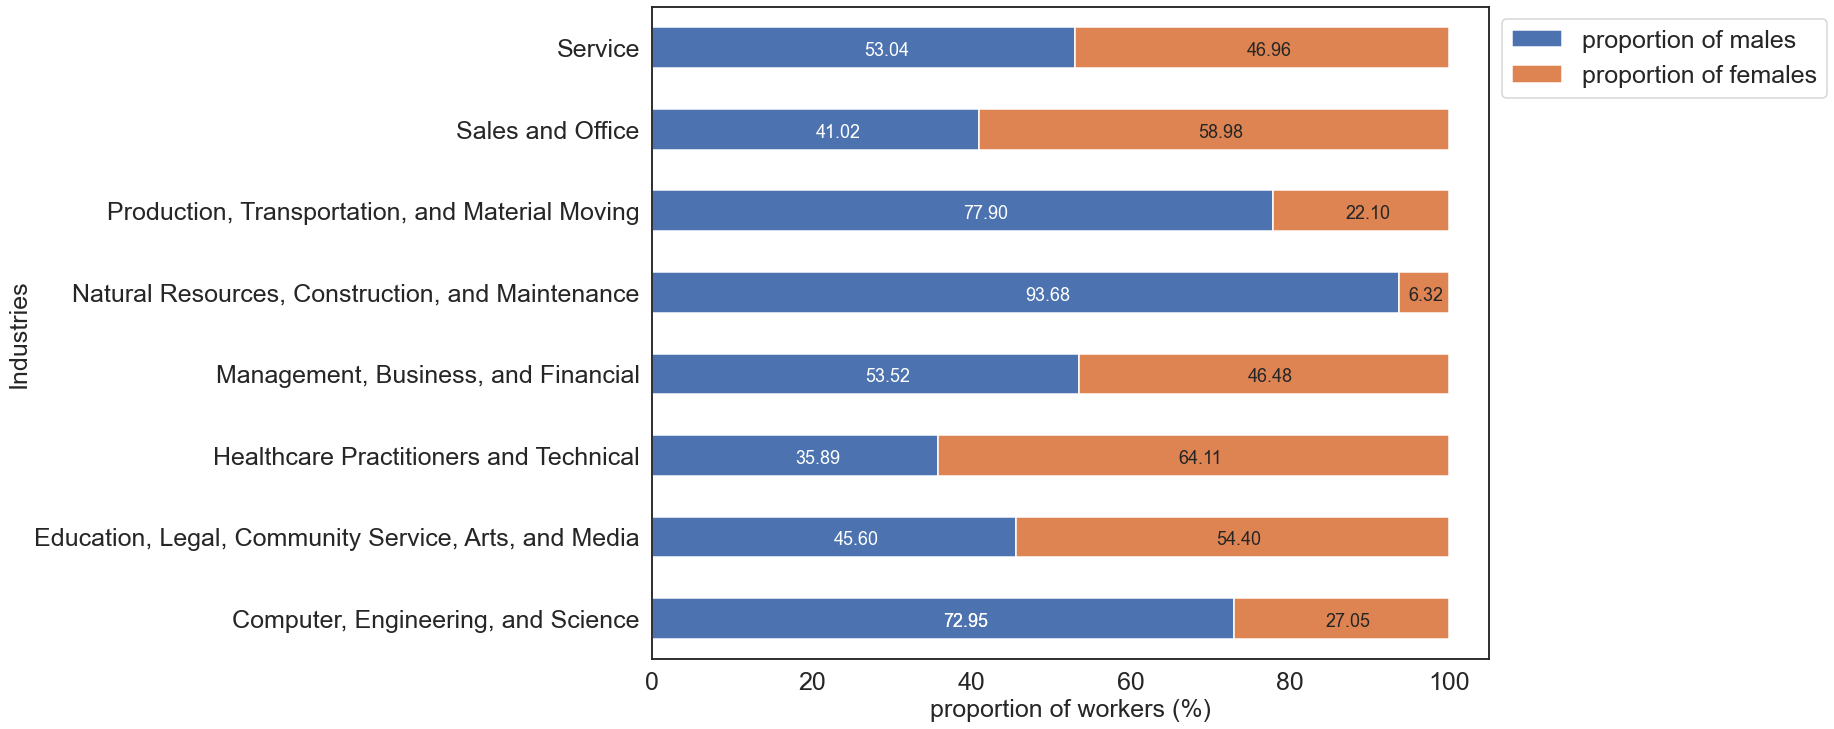

In [25]:
# stacked barplot for percent of male and female across different industries
workers_percent = gender_by_ind.plot.barh(stacked = True, fontsize = 25)
workers_percent.set_xlabel('proportion of workers (%)',fontsize = 25)
workers_percent.set_ylabel('Industries',fontsize = 25)
plt.legend(['proportion of males', 'proportion of females'],bbox_to_anchor=(1, 1), loc=2, fontsize = 25)

plt.text(workers_percent.patches[0].get_width()/2, workers_percent.patches[0].get_y()+0.15, s="{:.2f}".format(gender_by_ind['percent_male'][0]), c='white')

for i in range(len(gender_by_ind)):
    plt.text(workers_percent.patches[i].get_width()/2, 
             workers_percent.patches[i].get_y()+0.15, 
             s="{:.2f}".format(gender_by_ind['percent_male'][i]),
             c='white')
for i in range(len(gender_by_ind)):
    plt.text(workers_percent.patches[i].get_width()-2+workers_percent.patches[i+8].get_width()/2, 
             workers_percent.patches[i+8].get_y()+0.15, 
             s="{:.2f}".format(gender_by_ind['percent_female'][i]))
    

We define the "dominate" as the difference between the proportion of male and female workers is over 20%, so we want to look at this difference in the eight industries to see if they are male-dominated, female-dominated nor neither male-dominated nor female-dominated. As a result, we calculate this difference below.

In [112]:
# calculate the difference between the proportion of male and female workers
employ_diff = gender_by_ind['percent_male']- gender_by_ind['percent_female']
employ_diff.head(8)

Industry
Computer, Engineering, and Science                      45.91
Education, Legal, Community Service, Arts, and Media    -8.81
Healthcare Practitioners and Technical                 -28.21
Management, Business, and Financial                      7.04
Natural Resources, Construction, and Maintenance        87.36
Production, Transportation, and Material Moving         55.81
Sales and Office                                       -17.95
Service                                                  6.09
dtype: float64

From the calculation above, we can see that there are three industries that are male-dominated (with a positive difference), two industries that are female-dominated (with a negative difference), and three industries that are neither male nor female-dominated. Below, we will explore two industries that are the most male-dominated and female-dominated to see their relationship with the female and male income, and we will investigate all eight industries in later analysis to avoid redundancy.

### Male-dominated industry

From the barplot above, we find that Natural Resources, Construction, and Maintenance is the most male-dominated industry (less than 10% female, where male is significantly more than female), so we further examine the income of males in this industry. 

In [27]:
nrcm = employ_income[employ_income['Industry'] == 'Natural Resources, Construction, and Maintenance']

We want to first look at if there is any outlier in males' annual income in this dataset.

In [28]:
# overview of the data
# upper limit threshold for finding an outlier = Q3 + 1.5*IQR where IQR = Q3 - Q1
pd.set_option('display.max_rows',10)
nrcm.describe() 

,year,total_workers,workers_male,workers_female,percent_male,percent_female,total_earnings_male,total_earnings_female
count,282.00,2.82e+02,2.82e+02,282.00,282.00,282.00,282.00,282.00
mean,2014.51,1.40e+05,1.35e+05,5421.52,93.68,6.32,43661.00,38549.11
std,1.12,2.13e+05,2.07e+05,10241.72,9.69,9.69,11896.30,15510.49
min,2013.00,2.13e+03,1.49e+03,90.00,34.97,0.40,22957.00,11080.00
25%,2014.00,2.06e+04,1.92e+04,752.25,93.82,1.70,35032.00,29752.25
50%,2015.00,4.47e+04,4.22e+04,1456.50,96.83,3.15,41945.00,35580.00
75%,2015.75,1.41e+05,1.30e+05,5803.50,98.28,6.15,50751.75,43862.50
max,2016.00,1.18e+06,1.15e+06,83108.00,99.60,65.03,85807.00,158929.00


In [29]:
# upper whisker for finding an outlier of total earnings male
upper_whisker_male = 50751.75 + 1.5*(50751.75-35032)
upper_whisker_male

74331.375

We first look at the annual income of males in this industry.

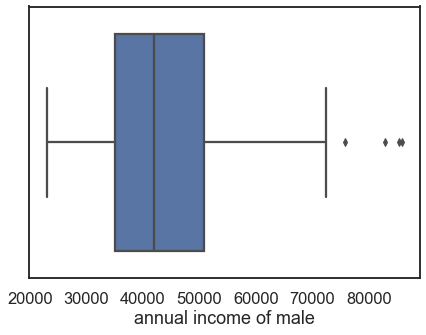

In [30]:
# also look at the box plot
plt.figure(figsize=(7,5))
sns.boxplot(x = 'total_earnings_male', data = nrcm).set(xlabel='annual income of male'); 

From the above boxplot, there are occupations in Natural Resources, Construction, and Maintenance Industry that have high annual income of males which is greater than 74331.375. We take a look at these outliers:

In [31]:
nrcm[nrcm['total_earnings_male'] > upper_whisker_male]['occupation'].value_counts() 

Elevator installers and repairers                               3
Electrical and electronics repairers, industrial and utility    1
Name: occupation, dtype: int64

We can see that these occpuations are most repairation related, and it makes sense that they are particularly male dominated and so have higher male earnings.

We also look at the the correlation between total earnings for male workers and the percent of males in different occupations in this male-dominated industry.

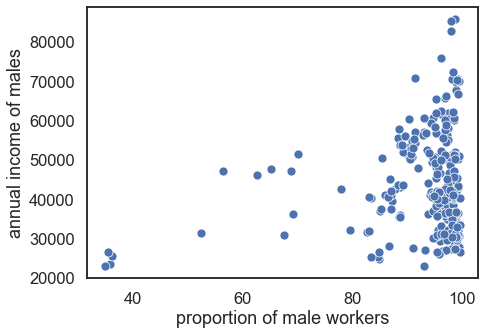

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = nrcm['percent_male'] , y = nrcm['total_earnings_male'],  data = nrcm, palette = 'blue').set(xlabel='proportion of male workers', ylabel = 'annual income of males');

From the above scatter plot, there is an upward trend in general. The more male-dominated the occupations are, it is more likely for males in this male-dominated industry to have higher total earnings. Notice that in the graph there are occupations that are not dominated by males (like around 30% of males), and the corresponding earnings of males are also low, which makes sense due to the trend in this graph and shows the possible income gap between males and females.

### Female-dominated industry

Besides male-dominated industries, we also want to look at the female-dominated industry. From the barplot of the employment rate of male and female workers in the eight industries in the general overview, we find Healthcare Practitioners and Technical is female-dominated, so we will further examine income in this industry:

In [33]:
hpt = employ_income[employ_income['Industry'] == 'Healthcare Practitioners and Technical']

We want to first look at if there is any outlier in females' annual income in this dataset.

In [34]:
hpt.describe()

,year,total_workers,workers_male,workers_female,percent_male,percent_female,total_earnings_male,total_earnings_female
count,124.00,1.24e+02,124.00,1.24e+02,124.00,124.00,124.00,124.00
mean,2014.50,2.00e+05,55769.05,1.44e+05,35.89,64.11,81486.81,68051.49
std,1.12,4.00e+05,93370.09,3.45e+05,21.82,21.82,42023.71,31704.02
min,2013.00,5.56e+03,1668.00,9.53e+02,4.65,15.64,35640.00,31126.00
25%,2013.75,3.87e+04,7883.75,1.48e+04,15.56,53.10,49938.50,44970.25
50%,2014.50,8.62e+04,26364.00,5.57e+04,33.83,66.17,71213.50,60259.50
75%,2015.25,1.59e+05,68461.75,1.03e+05,46.91,84.47,101071.50,81793.75
max,2016.00,2.32e+06,495061.00,2.04e+06,84.36,95.30,231420.00,166388.00


In [35]:
# upper whisker for total earnings female
upper_whisker_female = 81793.75 + 1.5*(81793.75-44970.25)
upper_whisker_female

137029.0

Now we look at the annual income of females in this industry.

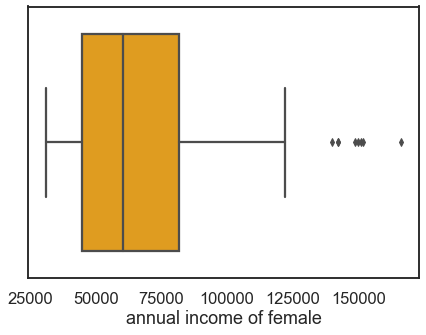

In [36]:
plt.figure(figsize=(7,5))
sns.boxplot(x = 'total_earnings_female', data = hpt, color = 'orange').set(xlabel='annual income of female');

From the above boxplot, there are occupations in Healthcare Practitioners and Technical that have high earnings of female which is greater than 137029. We will have a look at these outliers:

In [37]:
hpt[hpt['total_earnings_female'] > upper_whisker_female]['occupation'].value_counts()

Physicians and surgeons    4
Nurse anesthetists         4
Name: occupation, dtype: int64

We can see that these occpuations are most medical and nurse related, which makes sense that they are particularly female dominated.

We also look at the the correlation between total earnings for female workers and the percent of females in different occupations in this female dominated industry.

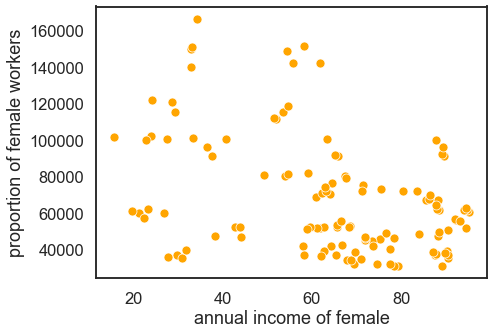

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = hpt['percent_female'] , y = hpt['total_earnings_female'],  data = hpt, color = 'orange').set(xlabel='annual income of female',ylabel = 'proportion of female workers');

From the above scatterplot, it seems that there is no correlation between the annual female income and the percent of females in each occupation in this female-dominated industry. The high employment rate of females in specific occupations does not have a relationship with high female income. However, we can see that even though in a female-dominated industry, those occupations with a higher percentage of females do not tend to have higher total earnings for females, which may imply that the income gap between males and females doesn't change even though the industry is female-dominated.

## Tests and Analysis

For the analysis, we first want to separate it into the eight major industries that the dataset contains and look at the income distributions of them separately.

In [39]:
employ_income.Industry.unique().tolist()

['Management, Business, and Financial',
 'Computer, Engineering, and Science',
 'Education, Legal, Community Service, Arts, and Media',
 'Healthcare Practitioners and Technical',
 'Service',
 'Sales and Office',
 'Natural Resources, Construction, and Maintenance',
 'Production, Transportation, and Material Moving']

### 1. Management, Business, and Financial Industry

We first look at the Management, Business, and Financial Industry. 

In [40]:
# create the income dataset of males and females in this industry for visualization
MBF = employ_income[employ_income.Industry == 'Management, Business, and Financial']

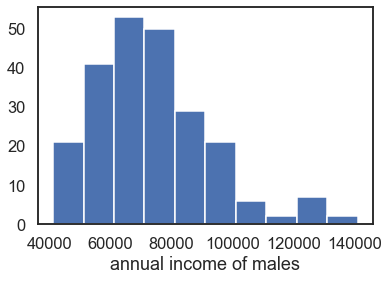

In [41]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(MBF.total_earnings_male);
plt.xlabel("annual income of males");

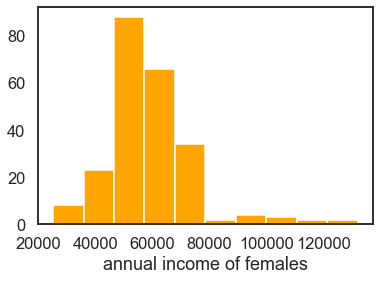

In [42]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(MBF.total_earnings_female,color = 'orange');
plt.xlabel("annual income of females"); 

The two distributions of male and female income are not normal, we take log transformations on these two distributions in order to perfrom t-test.

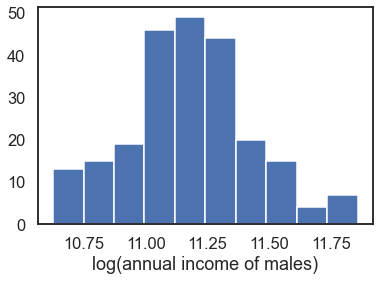

In [43]:
# log transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(MBF.total_earnings_male));
plt.xlabel('log(annual income of males)'); 

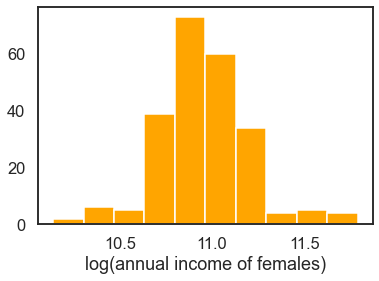

In [44]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(MBF.total_earnings_female),color = 'orange');
plt.xlabel("log(annual income of females)"); 

After transforming the distributions of male and female incomes, we perform the t-test.

- Null hypothesis: There is no difference in the annual income of males and females in this industry. 
- Alternative hypothesis: The annual income of males is greater than that of females in this industry. 

Significance level: 95%

In [45]:
difference_MBF = ttest_ind(MBF.total_earnings_male, MBF.total_earnings_female, alternative="greater")

display (difference_MBF)

Ttest_indResult(statistic=9.058588364798101, pvalue=1.8717485020747266e-18)

From the above t-test, the p-value is 1.8717485020747266e-18 < 0.05. As a result, we reject the null hypothesis, and males have a higher income in Management, Business, and Financial Industry than females. It shows that there might be some gender bias when comparing females' income to that of males. From the stacked barplot in EDA, we observe that this industry is neither male nor female-dominated since the proportions of male and female workers are close. Therefore, we do not observe any effect of male or female dominance in this industry on their incomes.

However, we think there might be some confounding factors that may contribute to this difference, so we also want to explore the possible effects of confounding variables. We will look at the education levels of male and female workers, specifically, the percent of male and female workers with a bachelor's degree, since it is a reasonable factor that may affect people's income in general.

In [46]:
# extract the data of education levels of males and females in this industry
MBF_edu = edu[edu.Industry == 'Management, Business, and Financial']

We want to see that if the education levels of males and females will affect their income, as a result, we want to compare the proportion of men and women who with bachelor degrees in this industry. If the proportion of males with bachelor degrees is much greater than that of females, the observed income gap might be partly due to the difference in educational levels between males and females.

In [47]:
# calculate the proportion of males who have bachelor degrees
MBF_men_with_bach = np.sum((MBF_edu.men_with_bachelors) / (np.sum( MBF_edu.men_with_bachelors) + np.sum(MBF_edu.mens_less_bachelors))*100)
MBF_men_with_bach

58.74046859805851

In [48]:
# calculate the proportion of males who have bachelor degrees
MBF_women_with_bach = np.sum((MBF_edu.women_with_bachelors) / (np.sum( MBF_edu.women_with_bachelors) + np.sum(MBF_edu.womens_less_bachelors))*100)
MBF_women_with_bach

58.12548710309858

In [49]:
# calculate the difference between the proportion of male bachelors and female bachelors
MBF_diff = MBF_men_with_bach - MBF_women_with_bach
MBF_diff

0.6149814949599346

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 0.61%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income gap. This means that gender may still be the main cause of the income gap between males and females in this industry, and males have higher income than females in general.

### 2. Computer, Engineering, and Science Industry

Next, we look at the Computer, Engineering, and Sicence industry. 

In [50]:
# create the income dataset of males and females in this industry for visualization
CES = employ_income[employ_income.Industry == 'Computer, Engineering, and Science']

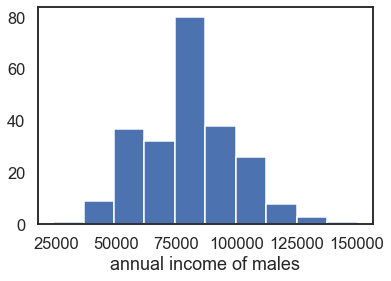

In [51]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(CES.total_earnings_male);
plt.xlabel('annual income of males');

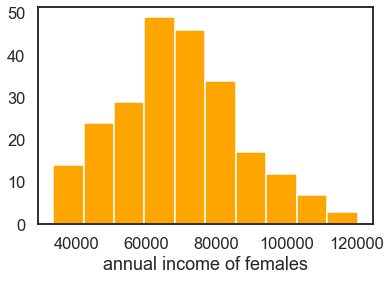

In [52]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(CES.total_earnings_female,color = 'orange');
plt.xlabel("annual income of females"); 

Since the two distributions of income of males and females are approximately normal, we perfrom a t-test.

- Null hypothesis: There is no difference in the annual income of males and females in this industry. 
- Alternative hypothesis: The annual income of males is greater than that of females in this industry. 

Significance level: 95%

In [53]:
# perform t-test
ttest_ind(CES.total_earnings_male, CES.total_earnings_female, alternative="greater")

Ttest_indResult(statistic=6.262766216681211, pvalue=4.2866222832617026e-10)

From the above t-test, the p-value is 4.2866222832617026e-10 < 0.05. As a result, we reject the null hypothesis, and that males have a higher income than females in the Computer, Engineering, and Science industry. It shows that there might be some gender bias when comparing females' income to that of males. From the stacked barplot in the EDA, we can see that it is a male-dominated industry, which is the proportion of male workers is 45.9% higher than female workers, and we can see that this male-dominated condition may also contribute to the income gap between males and females.

We then do a confounding analysis with educational level as before.

In [54]:
# extract the data education levels of males and females in this industry
CES_edu = edu[edu.Industry == 'Computer, Engineering, and Science']

In [55]:
# calculate the proportion of males who have bachelor degrees
CES_men_with_bach = np.sum((CES_edu.men_with_bachelors) / (np.sum(CES_edu.men_with_bachelors) + np.sum(CES_edu.mens_less_bachelors))*100)
CES_men_with_bach

56.059454158022206

In [56]:
# calculate the proportion of females who have bachelor degrees
CES_women_with_bach = np.sum((CES_edu.women_with_bachelors) / (np.sum(CES_edu.women_with_bachelors) + np.sum(CES_edu.womens_less_bachelors))*100)
CES_women_with_bach

56.20901227431902

In [57]:
# calculate the difference between the proportion of male bachelors and female bachelors
CES_diff = CES_men_with_bach - CES_women_with_bach
CES_diff

-0.14955811629681648

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 0.15%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income gap. This means that gender may still be the main cause of the income gap between males and females in this industry, and males have a higher income than females in general.

### 3. Education, Legal, Community Service, Arts, and Media Industry

Next, we look at the Education, Legal, Community Service, Arts and Media Industry.

In [58]:
# create the income dataset of males and females in this industry for visualization
ELCAM = employ_income[employ_income.Industry == 'Education, Legal, Community Service, Arts, and Media']

We check for normality of income, and the income of males and females do not follow the normal distribution, so we perform a log transformation, and the transfromed data follows the normal distribution.

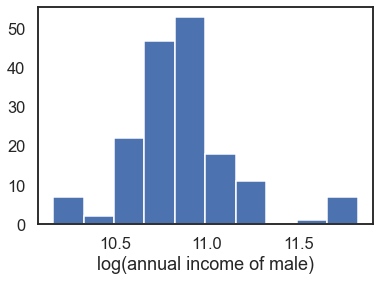

In [59]:
# log transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(ELCAM.total_earnings_male));
plt.xlabel("log(annual income of male)");

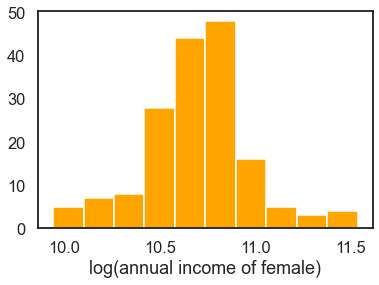

In [60]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(ELCAM.total_earnings_female),color = 'orange');
plt.xlabel("log(annual income of female)"); 

- Null hypothesis: There is no difference in the annual income of males and females in this industry. 
- Alternative hypothesis: The annual income of males is greater than that of females in this industry. 

Significance level: 95%

In [61]:
# perform the t-test
ttest_ind(np.log(ELCAM.total_earnings_male), np.log(ELCAM.total_earnings_female), alternative="greater")

Ttest_indResult(statistic=5.095136647467086, pvalue=2.9208992775273326e-07)

From the above t-test, the p-value is 2.9208992775273326e-07 < 0.05. As a result, we reject the null hypothesis, and that males have a higher income than females in the Education, Legal, Community Service, Arts, and Media Industry. It shows that there might be some gender bias when comparing females' income to that of males. From the stacked barplot in EDA, we observe that this industry is neither male nor female-dominated since the proportion of male and female workers are very close. Therefore, we do not observe the effect of male or female dominance in this industry on their incomes.

We then do a confounding analysis with educational level as before.

In [62]:
# extract the data education levels of males and females in this industry
ELCAM_edu = edu[edu.Industry == 'Education, Legal, Community Service, Arts, and Media']

In [63]:
# calculate the proportion of males who have bachelor degrees
ELCAM_men_with_bach = np.sum((ELCAM_edu.men_with_bachelors) / (np.sum(ELCAM_edu.men_with_bachelors) + np.sum(ELCAM_edu.mens_less_bachelors))*100)
ELCAM_men_with_bach

56.35766760920547

In [64]:
# calculate the proportion of females who have bachelor degrees
ELCAM_women_with_bach = np.sum((ELCAM_edu.women_with_bachelors) / (np.sum(ELCAM_edu.women_with_bachelors) + np.sum(ELCAM_edu.womens_less_bachelors))*100)
ELCAM_women_with_bach

57.569297348868425

In [65]:
# calculate the difference between the proportion of male bachelors and female bachelors
ELCAM_diff = ELCAM_men_with_bach - ELCAM_women_with_bach
ELCAM_diff

-1.2116297396629534

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 1.21%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income gap. This means that gender may still be the main cause of the income gap between males and females in this industry, and males have a higher income than females in general.

### 4. Healthcare Practitioners and Technical Industry

Next, we look at the Healthcare Practitioners and Technical Industry. 

In [66]:
# create the income dataset of males and females in this industry for visualization
HPT = employ_income[employ_income.Industry == 'Healthcare Practitioners and Technical']

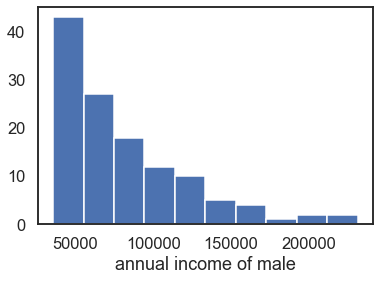

In [67]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(HPT.total_earnings_male);
plt.xlabel("annual income of male"); 

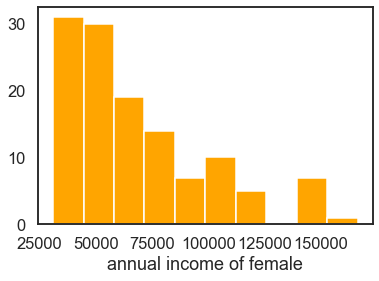

In [68]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(HPT.total_earnings_female, color = 'orange');
plt.xlabel("annual income of female");  

After we look at the distribution of income data of males and females in this industry, we notice that both of them do not have normal distributions. After log-transformation, the data is still not normal.

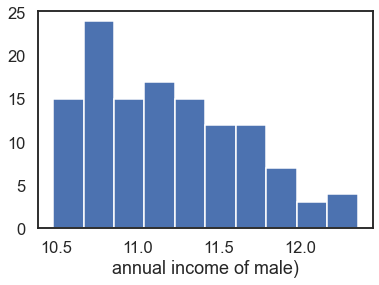

In [69]:
# log transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(HPT.total_earnings_male));
plt.xlabel("annual income of male)"); 

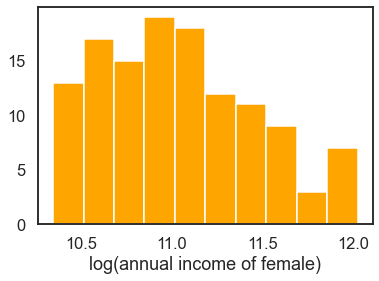

In [70]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(HPT.total_earnings_female), color = 'orange');
plt.xlabel("log(annual income of female)"); 

Without the normality assumption, we decide to use K-S test to see whether the income of males and females have the same distribution in this industry. 

- Null hypothesis: The income of males and females have the same distribution in this industry.  
- Alternative hypothesis: The income of males and females do not have the same distribution in this industry. 

Significance level: 95%

In [71]:
# perform ks test
ks_2samp(HPT.total_earnings_male, HPT.total_earnings_female)

KstestResult(statistic=0.16129032258064516, pvalue=0.07936465968200286)

From the above K-S test, the p-value is 0.07936465968200286 > 0.05. As a result, we fail to reject the null hypothesis. Therefore, there is not sufficient evidence for us to believe that the income of males and females do not have the same distribution, and it is likely that the income distributions of males and females are close in this industry. From the stacked barplot in EDA, we observe that this industry is female-dominated (with 28.21% more female workers than male workers), so we would expect some differences in the income distributions of males and females. However, the K-S test above does not give us statistically significant evidence to believe in so, and because we cannot investigate the effect of gender bias here, we also cannot look at the possible effect of education level here.

### 5. Service

We then look at the Service Industry.

In [72]:
# create the income dataset of males and females in this industry for visualization
service = employ_income[employ_income.Industry == 'Service']

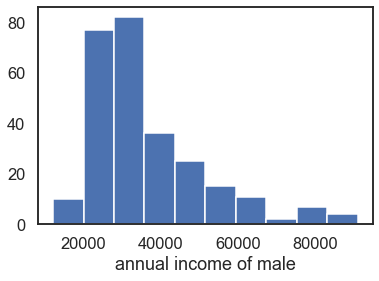

In [73]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(service.total_earnings_male);
plt.xlabel("annual income of male"); 

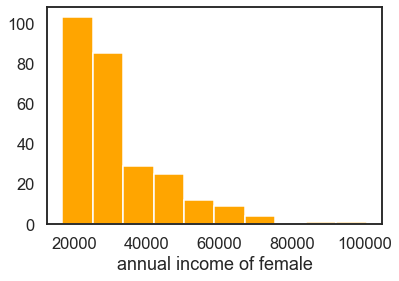

In [74]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(service.total_earnings_female, color = 'orange');
plt.xlabel("annual income of female"); 

Since the two distributions of male and female income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

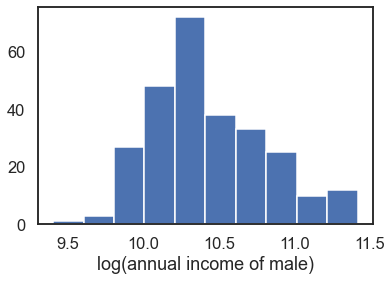

In [75]:
# log transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(service.total_earnings_male));
plt.xlabel("log(annual income of male)"); 

Income of male is tranformed to normal distribution by log transformation.

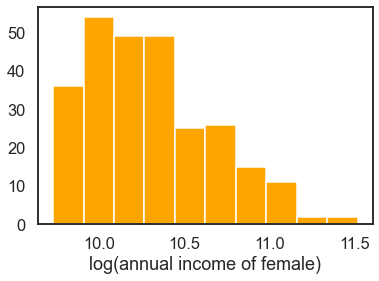

In [76]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(service.total_earnings_female),color = 'orange');
plt.xlabel("log(annual income of female)");

After transformation, income of female is still not normal, so we'll go into ks test with the original distribution.

Without the normality assumption, we decide to use K-S test to see whether the income of males and females have the same distribution in this industry.

- Null hypothesis: Ther income of males and females have the same distribution in this industry.  
- Alternative hypothesis: The income of males and females do not have the same distribution in this industry. 

Significance level: 95%

In [77]:
ks_2samp(service.total_earnings_male, service.total_earnings_female)

KstestResult(statistic=0.20446096654275092, pvalue=2.4653976751499726e-05)

From the above K-S test, the p-value is 2.4653976751499726e-05 < 0.05. As a result, we reject the null hypothesis, and there is statistically significant evidence for us to conclude that it is unlikely the income of males and females in this industry have the same distribution. It does suggest that there is a difference between male and female income, however, the K-S test cannot tell the underlying gender bias toward women, which is females earn less than males.

From the stacked barplot in EDA, we observe that this industry is neither male nor female-dominated, and the K-S test above give us statistically significant evidence to say that there are some differences between male and female income, which may suggest even though the employment rates of males and females in this industry are very close, the income difference between males and females still exists. However, we cannot say whether male or female income is higher, and it's not enough to show the gender bias toward women under the income gap.

Still, we want to check the possible effect of the education level of males and females on the income gap in this industry. The steps we take are the same as the analysis of the last industry.

In [78]:
# extract the data of education levels of males and females in this industry
service_edu = edu[edu.Industry == 'Service']

In [79]:
# calculate the proportion of males who have bachelor degrees
service_men_with_bach = np.sum((service_edu.men_with_bachelors) / (np.sum(service_edu.men_with_bachelors) + np.sum(service_edu.mens_less_bachelors))*100)
service_men_with_bach

54.96465859119972

In [80]:
# calculate the proportion of females who have bachelor degrees
service_women_with_bach = np.sum((service_edu.women_with_bachelors) / (np.sum(service_edu.women_with_bachelors) + np.sum(service_edu.womens_less_bachelors))*100)
service_women_with_bach

55.76744065239012

In [81]:
# calculate the difference between the proportion of male bachelors and female bachelors
service_diff = service_men_with_bach - service_women_with_bach
service_diff

-0.8027820611903991

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 0.8%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income difference. However, it's hard to tell whether male income is higher than female income.

### 6. Sales and Office

We look at the Sales and Office Industry. 

In [82]:
# create the income dataset of males and females in this industry for visualization
SO = employ_income[employ_income.Industry == 'Sales and Office']

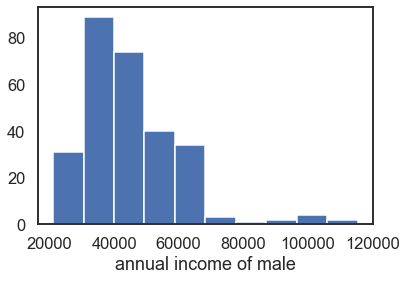

In [83]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(SO.total_earnings_male);
plt.xlabel("annual income of male"); 

Since the distributions of male income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

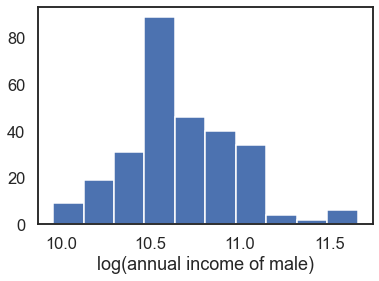

In [84]:
# long transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(SO.total_earnings_male));
plt.xlabel("log(annual income of male)"); 

However, after log transformation, the distribution of total earnings of male is still not normal.

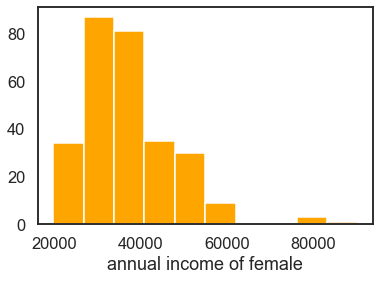

In [85]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(SO.total_earnings_female, color = 'orange');
plt.xlabel("annual income of female"); 

Since the distributions of female income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

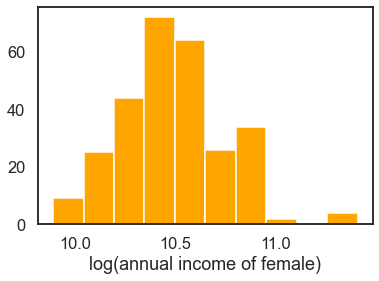

In [86]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(SO.total_earnings_female), color = 'orange');
plt.xlabel("log(annual income of female)"); 

However, after log transformation, the distribution of total earnings of female is still not normal,so we decided to use K-S test with original distribution.

Without the normality assumption, we decide to use K-S test to see whether the income of males and females have the same distribution in this industry.

- Null hypothesis: Ther income of males and females have the same distribution in this industry.  
- Alternative hypothesis: The income of males and females do not have the same distribution in this industry. 

Significance level: 95%

In [87]:
ks_2samp(SO.total_earnings_male, SO.total_earnings_female)

KstestResult(statistic=0.275, pvalue=1.0053874370569515e-09)

From the above K-S test, the p-value is 1.0053874370569515e-09 < 0.05. As a result, we reject the null hypothesis, and there is statistically significant evidence for us to conclude that it is unlikely the income of males and females in this industry have the same distribution. It does suggest that there is a difference between male and female income, however, the K-S test cannot tell the underlying gender bias toward women, which is females earn less than males.

From the stacked barplot in EDA, we observe that this industry is female-dominated (with 17.95% more female workers than male workers), so we would expect some differences in the income distributions of males and females, and the K-S test gives us some statistically significant evidence to believe in so, but again, it cannot show whether male or female income is higher, and we cannot see the underlying gender bias.

Still, we want to check the possible effect of the education level of males and females on the income gap in this industry. The steps we take are the same as the analysis of the last industry.

In [88]:
# extract the data of education levels of males and females in this industry
SO_edu = edu[edu.Industry == 'Sales and Office']

In [89]:
# calculate the proportion of males who have bachelor degrees
SO_men_with_bach = np.sum((SO_edu.men_with_bachelors) / (np.sum(SO_edu.men_with_bachelors) + np.sum(SO_edu.mens_less_bachelors))*100)
SO_men_with_bach

56.272377708642985

In [90]:
# calculate the proportion of females who have bachelor degrees
SO_women_with_bach = np.sum((SO_edu.women_with_bachelors) / (np.sum(SO_edu.women_with_bachelors) + np.sum(SO_edu.womens_less_bachelors))*100)
SO_women_with_bach

55.827860306886016

In [91]:
# calculate the difference between the proportion of male bachelors and female bachelors
SO_diff = SO_men_with_bach - SO_women_with_bach
SO_diff

0.4445174017569684

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 0.44%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income difference. However, it's hard to tell whether male income is higher than female income.

### 7. Natural Resources, Construction, and Maintenance

We look at the Natural Resources, Construction, and Maintenance Industry. 

In [92]:
# create the income dataset of males and females in this industry for visualization
NCM = employ_income[employ_income.Industry == 'Natural Resources, Construction, and Maintenance']

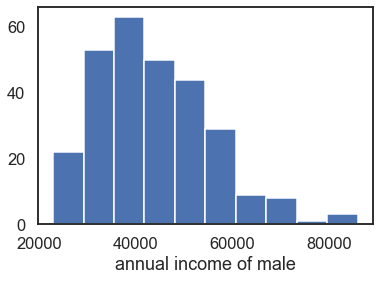

In [93]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(NCM.total_earnings_male);
plt.xlabel("annual income of male"); 

Since the distributions of male income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

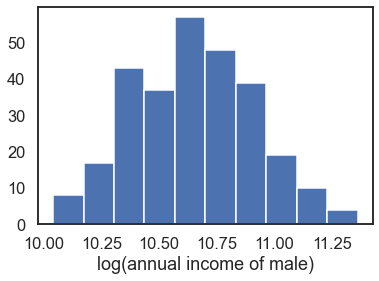

In [94]:
# log transform of male
plt.figure(figsize=(6,4))
plt.hist(np.log(NCM.total_earnings_male));
plt.xlabel("log(annual income of male)"); 

Now the distribution of income of male is transformed into normal distribution with log transformation.

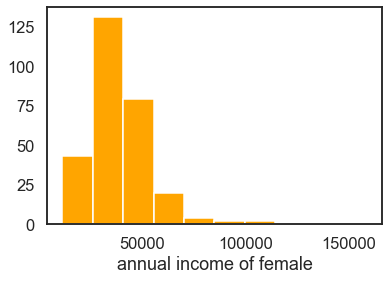

In [95]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(NCM.total_earnings_female, color = 'orange');
plt.xlabel("annual income of female"); 

Since the distributions of female income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

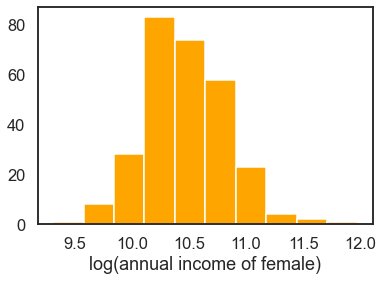

In [96]:
# log transform of female
plt.figure(figsize=(6,4))
plt.hist(np.log(NCM.total_earnings_female), color = 'orange');
plt.xlabel("log(annual income of female)");

Now the distribution of income of male is transformed into normal distribution with log transformation. 

After transforming the distributions of male and female incomes, we perform the t-test.

- Null hypothesis: There is no difference in the annual income of males and females in this industry. 
- Alternative hypothesis: The annual income of males is greater than that of females in this industry. 

Significance level: 95%

In [97]:
ttest_ind(np.log(NCM.total_earnings_male), np.log(NCM.total_earnings_female))

Ttest_indResult(statistic=5.8275925727548525, pvalue=9.479821012972613e-09)

From the above t-test, the p-value is 9.479821012972613e-09 < 0.05. As a result, we reject the null hypothesis, and that males have a higher income than females in Natural Resources, Construction, and Maintenance. It shows that there might be some gender bias when comparing females' income to that of males. From the stacked barplot in the EDA, we can see that it is a male-dominated industry, which is the proportion of male workers is 87.36% higher than female workers, and we can see that this male-dominated condition may also contribute to the income gap between males and females.

Still, we want to check the possible effect of the education level of males and females on the income gap in this industry. The steps we take are the same as the analysis of the last industry.

In [98]:
# extract the data of education levels of males and females in this industry
NCM_edu = edu[edu.Industry == 'Natural Resources, Construction, and Maintenance']

In [99]:
# calculate the proportion of males who have bachelor degrees
NCM_men_with_bach = np.sum((NCM_edu.men_with_bachelors) / (np.sum(NCM_edu.men_with_bachelors) + np.sum(NCM_edu.mens_less_bachelors))*100)
NCM_men_with_bach

54.914728306723816

In [100]:
# calculate the proportion of females who have bachelor degrees
NCM_women_with_bach = np.sum((NCM_edu.women_with_bachelors) / (np.sum(NCM_edu.women_with_bachelors) + np.sum(NCM_edu.womens_less_bachelors))*100)
NCM_women_with_bach

58.56347052188019

In [101]:
# calculate the difference between the proportion of male bachelors and female bachelors
NCM_diff = NCM_men_with_bach - NCM_women_with_bach
NCM_diff

-3.648742215156375

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of 3.65%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income gap. This means that gender may still be the main cause of the income gap between males and females in this industry, and males have a higher income than females in general.

### 8. Production, Transportation, and Material Moving

We look at the Production, Transportation, and Material Moving Industry. 

In [102]:
# create the income dataset of males and females in this industry for visualization
PTM = employ_income[employ_income.Industry == 'Production, Transportation, and Material Moving']

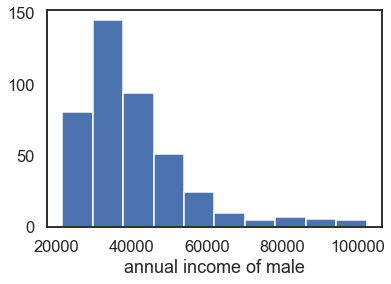

In [103]:
# look at the distribution of male income data
plt.figure(figsize=(6,4))
plt.hist(PTM.total_earnings_male);
plt.xlabel("annual income of male"); 

Since the distributions of male income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

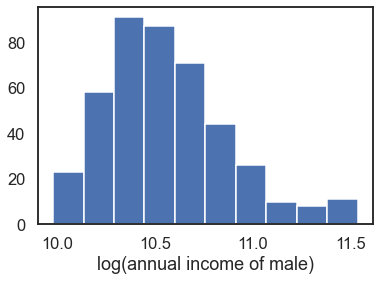

In [104]:
# log transform for male
plt.figure(figsize=(6,4))
plt.hist(np.log(PTM.total_earnings_male));
plt.xlabel("log(annual income of male)"); 

However, after log transformation, the distribution of total earnings of male is still not normal.

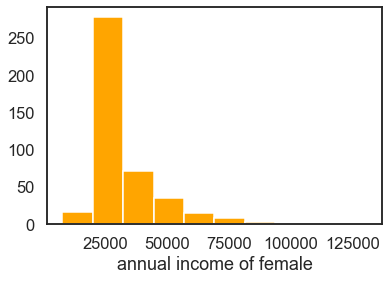

In [105]:
# look at the distribution of female income data
plt.figure(figsize=(6,4))
plt.hist(PTM.total_earnings_female, color = 'orange');
plt.xlabel("annual income of female"); 

Since the distributions of female income are not normal, we try to log transform the distributions into normal distributions to see if we can do t test later.

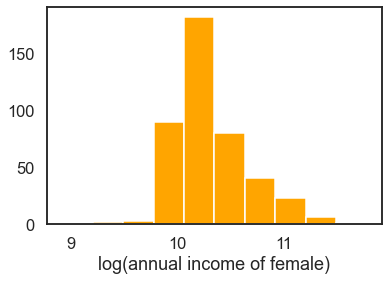

In [106]:
# log transform for female
plt.figure(figsize=(6,4))
plt.hist(np.log(PTM.total_earnings_female), color ='orange');
plt.xlabel("log(annual income of female)"); 

After we look at the distribution of income data of males and females in this industry, we notice that both of them do not have normal distributions. After log-transformation, the data is still not normal.

Without the normality assumption, we decide to use K-S test to see whether the income of males and females have the same distribution in this industry.

- Null hypothesis: The income of males and females have the same distribution in this industry.  
- Alternative hypothesis: The income of males and females do not have the same distribution in this industry. 

Significance level: 95%

In [107]:
ks_2samp(PTM.total_earnings_male, PTM.total_earnings_female)

KstestResult(statistic=0.38927738927738925, pvalue=2.2046057794471134e-29)

From the above K-S test, the p-value is 2.2046057794471134e-29 < 0.05. As a result, we reject the null hypothesis, and there is statistically significant evidence for us to conclude that it is unlikely the income of males and females in this industry have the same distribution. It does suggest that there is a difference between male and female income, however, the K-S test cannot tell the underlying gender bias toward women, which is females earn less than males.

From the stacked barplot in EDA, we observe that this industry is male-dominated (with 55.81% more female workers than male workers), so we would expect some differences in the income distributions of males and females, and the K-S test gives us some statistically significant evidence to believe in so, but again, it cannot show whether male or female income is higher, and we cannot see the underlying gender bias.

Still, we want to check the possible effect of the education level of males and females on the income gap in this industry. The steps we take are the same as the analysis of the last industry.

In [108]:
# extract the data of education levels of males and females in this industry
PTM_edu = edu[edu.Industry == 'Production, Transportation, and Material Moving']

In [109]:
# calculate the proportion of males who have bachelor degrees
PTM_men_with_bach = np.sum((PTM_edu.men_with_bachelors) / (np.sum(PTM_edu.men_with_bachelors) + np.sum(PTM_edu.mens_less_bachelors))*100)
PTM_men_with_bach

53.4985010646794

In [110]:
# calculate the proportion of females who have bachelor degrees
PTM_women_with_bach = np.sum((PTM_edu.women_with_bachelors) / (np.sum(PTM_edu.women_with_bachelors) + np.sum(PTM_edu.womens_less_bachelors))*100)
PTM_women_with_bach

57.81172349995055

In [111]:
# calculate the difference between the proportion of male bachelors and female bachelors
PTM_diff = PTM_men_with_bach - PTM_women_with_bach
PTM_diff

-4.31322243527115

From the result above, we see that the proportion of males with bachelor degrees and that of females are close, with only a tiny difference of around 4.31%. That indicates the numbers of males and females who have the same education level are similar in this industry, so education level may not be a confounding factor that results in the income difference. However, it's hard to tell whether male income is higher than female income.

# Ethics & Privacy

   To ensure the credibility and reliability of our analysis, we utilized two datasets from surveys conducted by the U.S Government Works (the datasets are published on Kaggle also). It is the official web portal of the United States federal government, and it is designed to improve the public's interaction with the US government by quickly directing website visitors to the services or information they are seeking, and by inviting the public to share ideas to improve government. Their method of obtaining data involves collecting responses from respondents directly and gathering information from different businesses and government agencies. The survey and sampling methods they used to obtain the data were ethical since all of the data they collect through censuses and surveys is confidential and protected by federal law. Furthermore, we have permission to use this data because the datasets used are public on the Kaggle website, requiring no cost to gain access to. At the same time, all of the personally identifiable information (names, addresses, races, etc) was removed from the two datasets, and the datasets are stored securely on the website.
   
   Our research question originally is whether there is an income difference in male and female workers in different industries in the U.S, and we believe there are enough data for us to answer our question even after we did data cleaning. The datasets contains the variables that we need for analysis, such as the income and employment of male and female workers, as well as the education levels of these workers. However, there is some potential bias that underly the two datasets that may lead to problems for us to answer our question. For example, the dataset only contains the data from 2013 to 2016, and they don't show the trend between male and female workers among these industries recently. The two datasets also just contain eight industries in the U.S, and there might be data of other industries that are not collected. Due to these possible biases, we decided to specify the time range of our question as from 2013 to 2016 and the industries as the eight industries that the two datasets include to eliminate the potential bias of the answer that might be resulted from the datasets. We also notice that there are possible confounding variables that may also contribute to the income gap between males and females, so we decide to add another dataset (edu dataset) to investigate the effect of a possible confounding variable (education level).

# Conclusion & Discussion

Our research is aimed to investigate the income gap of male and female workers in different industries in the U.S, and whether the gap persists in those industries with significant patterns of male or female dominance. In our analysis, we also investigate one of the potential confounding factors on the income gap between male and female workers. We regard education level as the confounding factor since it is a reasonable factor that will affect one's income. To do our analysis, we find two datasets that were published on Kaggle. They were collected by the U.S Government Works. These datasets contain the number of male and female workers, their annual income, their employment rate, and their education level in different occupations of eight industries from 2013 to 2016 in the U.S, and these are the variables we use to answer our question.

We first perform EDA on the dataset and find that the income gap between male and female workers exists, more or less, among all eight industries. We observe that females always earn less than males, and no matter the industry is male or female-dominated, the difference in income still persists. As a result, we choose to use the t-test in our analysis to further test our hypothesis, which is females always earn less than males in the eight industries. After visualizing the distributions of males' and females' income in these industries, we find that some distributions do not follow the normal distribution, and without the normality assumption on these distributions of income, we cannot conduct a t-test, so we take log transformations on them and further check for normality. And if some transformed distributions are still not normal, we use a nonparametric test (K-S test) to test our hypothesis. The result shows that besides one industry (Healthcare Practitioners and Technical Industry), all other industries get a p-value, from either t-test or K-S test, of less than 0.05 under the 95% confidence level. Since K-S test cannot tell whether there is a gender bias toward women or men (that is, the female income is lower than male income), the results of the t-tests will be more informative consider our general hypothesis. Specifically, t-tests on four industries make us reject our null hypothesis and suggest that males' income is very likely to be greater than that of females, which implies the possible gender bias toward the females when they are in different workplaces. 

Among all four industries, three of them are male-dominated, and we see that the male income is always higher than females, which is what we expected. This income gap might be partly due to the reason that men hold most of the jobs in this industry, but we can see that women don't have equal working opportunities and income as men in these industries. For female-dominated industries, since all of the women-dominated industries need the K-S test, we cannot see the effect of female-dominated on the male and female income in this industry. However, we have one industry that is not especially female-dominated but does have 8.8% or more female workers than male workers. In this industry that we use t-test to analyze, which is the Education, Legal, Community Service, Arts, and Media Industry, we find that even though the female workers are more than males, female income is still lower than males. Even though the effect of gender dominance is not so obvious here, it does give us some clues to think that female dominance in a specific industry might not change or make too many changes to the income gap between males and females. Besides the dominance of males or females, we also analyze a confounding factor (education level). From the closeness of the proportions of males and females workers with bachelor degrees in these industries, we conclude that education level may not contribute significantly to the income difference of male and female workers.

The limitations in this project might be the K-S test that we use besides the t-test. Since the distributions of income in some industries do not follow the normal distribution, we have to perform K-S tests, which might not be very informative to our question. Also, the inconsistency of test methods using for these eight industries does not allow us to intercompare the results we have. We are unable to change the situation because we should treat normal distribution differently than the unnormal one when doing analysis. The results of all the K-S tests besides one industry (Healthcare Practitioners and Technical Industry) show that it is unlikely the income of males and females in this industry have the same distribution. Even though it cannot show that females earn less than males than the one-tailed t-test we did, it does suggest that there is a difference between male and female income, which also gives us evidence to think of the possible existence of an income gap between males and females, but this still needs further investigation.

The result of this project tells us that an income gap exists between males and females in these industries, and this inequality is not only limited to one or two of them. Even when males and females have the same education level, this income gap still persists. As we can tell in the background, women are always at a disadvantageous position at work compared with men. We only investigate their income gap in this project, but the gender bias issue may also lead to inequality between males and females in other different working conditions when they apply for jobs and at work, such as the hiring rate, opportunities for progression and promotion, consideration for needs, and so on. 
Females also face stereotypes in their career life. Some jobs are often considered as "male's work", for which females are incapable of doing, which makes their chances and flexibilities in applying for jobs much limited than those of males. We all know that gender inequality still persists in this world, and this is not limited to working conditions, but why can't we put more effort to eliminate it? It is worth it for everyone to ensure the equality of men and women not only on the income and other aspects at work but also on every aspect in our daily life to make this world a little better.

# Team Contributions

Aven Huang: Overview, Data Description, Data Cleaning, EDA, Test and Analysis

Jiaqi Feng: Overview, Data Description, Data Cleaning, EDA, Test and Analysis

Xilei Liu: Overview, Question & Background, Data Description, text of Data Cleaning, EDA, Data Analysis & Results, Ethics & Privacy, Conclusion & Discussion

Yiyi Xu: Overview, Question & Background, Data Description, text of Data Cleaning, EDA, Data Analysis & Results, Conclusion & Discussion